In [ ]:
!pip install -r requirements.txt

In [1]:
%load_ext autoreload
%autoreload 2

from collections import deque

import numpy as np
import matplotlib.pyplot as plt

from environment import AvalonEnv
from agent import RandomAgent, QTableAgent
from q_learning_trial import train

In [ ]:
env = AvalonEnv(5, enable_logs=False, autoplay=False)
CALLBACK_INTERVAL = 2000

agent = QTableAgent(env=env)
num_episodes = 1000000
episode_rewards, mean_eval_rewards, std_eval_rewards, mean_eval_penalties, agent_game_results  = train(num_episodes, env, agent, target_reward=5, last_n_plot=100, callback_every=CALLBACK_INTERVAL)


Average reward per episode -4.564
Average penalties per episode: 1.06
Agent won 21.428571428571427% games out of 28 games while taking MINION role.
Agent won 44.44444444444444% games out of 72 games while taking SERVANT role.

Average reward per episode -4.606
Average penalties per episode: 0.93
Agent won 33.33333333333333% games out of 66 games while taking SERVANT role.
Agent won 11.76470588235294% games out of 34 games while taking MINION role.

Average reward per episode -4.324999999999999
Average penalties per episode: 0.96
Agent won 20.51282051282051% games out of 39 games while taking MINION role.
Agent won 42.62295081967213% games out of 61 games while taking SERVANT role.

Average reward per episode -3.790999999999999
Average penalties per episode: 1.07
Agent won 27.500000000000004% games out of 40 games while taking MINION role.
Agent won 41.66666666666667% games out of 60 games while taking SERVANT role.

Average reward per episode -3.895
Average penalties per episode: 0.95


Average reward per episode -2.716999999999999
Average penalties per episode: 1.0
Agent won 46.774193548387096% games out of 62 games while taking SERVANT role.
Agent won 28.947368421052634% games out of 38 games while taking MINION role.

Average reward per episode -3.0069999999999992
Average penalties per episode: 0.86
Agent won 32.35294117647059% games out of 68 games while taking SERVANT role.
Agent won 25.0% games out of 32 games while taking MINION role.

Average reward per episode -3.3049999999999993
Average penalties per episode: 1.09
Agent won 17.5% games out of 40 games while taking MINION role.
Agent won 38.333333333333336% games out of 60 games while taking SERVANT role.

Average reward per episode -2.6839999999999997
Average penalties per episode: 0.91
Agent won 34.32835820895522% games out of 67 games while taking SERVANT role.
Agent won 30.303030303030305% games out of 33 games while taking MINION role.

Average reward per episode -2.7649999999999992
Average penalties pe


Average reward per episode -2.1049999999999995
Average penalties per episode: 0.99
Agent won 47.540983606557376% games out of 61 games while taking SERVANT role.
Agent won 33.33333333333333% games out of 39 games while taking MINION role.

Average reward per episode -2.3449999999999993
Average penalties per episode: 1.0
Agent won 47.540983606557376% games out of 61 games while taking SERVANT role.
Agent won 25.64102564102564% games out of 39 games while taking MINION role.

Average reward per episode -2.504
Average penalties per episode: 1.0
Agent won 23.809523809523807% games out of 42 games while taking MINION role.
Agent won 55.172413793103445% games out of 58 games while taking SERVANT role.

Average reward per episode -2.4639999999999995
Average penalties per episode: 0.91
Agent won 41.66666666666667% games out of 60 games while taking SERVANT role.
Agent won 27.500000000000004% games out of 40 games while taking MINION role.

Average reward per episode -2.3409999999999997
Averag


Average reward per episode -1.8679999999999994
Average penalties per episode: 0.87
Agent won 54.71698113207547% games out of 53 games while taking SERVANT role.
Agent won 34.04255319148936% games out of 47 games while taking MINION role.

Average reward per episode -1.8969999999999996
Average penalties per episode: 0.96
Agent won 35.714285714285715% games out of 42 games while taking MINION role.
Agent won 44.827586206896555% games out of 58 games while taking SERVANT role.

Average reward per episode -2.8479999999999994
Average penalties per episode: 0.94
Agent won 37.28813559322034% games out of 59 games while taking SERVANT role.
Agent won 14.634146341463413% games out of 41 games while taking MINION role.


## Plotting results

In [ ]:
def plot_eval_metric(metric_name, series, x_vals):
    plt.plot(x_vals, series)
    plt.xlabel('Episodes')
    plt.ylabel(metric_name)
    plt.show()
    

In [ ]:
selected_rewards = []
timesteps = []

for t, r in enumerate(episode_rewards):
    if t % 2000 == 0:
        selected_rewards.append(r)
        timesteps.append(t)
        
plt.plot(timesteps, selected_rewards)
plt.xlabel('Episodes')
plt.ylabel('Episode rewards')
plt.show()

In [ ]:
callback_episodes_range = np.arange(len(mean_eval_rewards)) * CALLBACK_INTERVAL

In [ ]:
plot_eval_metric('Mean evaluation penalties', mean_eval_penalties, callback_episodes_range)
plot_eval_metric('Mean evaluation rewards', mean_eval_rewards, callback_episodes_range)

for ctype, win_data in agent_game_results.items():
    if not ctype:
        continue
    plot_eval_metric(f'{ctype.name} win percent', win_data, callback_episodes_range)

## Explaining the Q-table

In [ ]:
from flatten_dict import flatten
from game.enums_and_config import CharacterType

servant_table = sorted(flatten(agent.q_table[CharacterType.SERVANT]).items(), key=lambda x: x[1])

In [ ]:
most_positive_q_servant = servant_table[-20:]
most_positive_q_servant

```
class ActionType(Enum):
    """
    Different action types.
    """
    TEAM_SELECTION = 0
    TEAM_APPROVAL = 1
    QUEST_VOTE = 2
```

`# Player visibilites, action type, current quest, proposal number, current leader`

What the q learning agent has learnt to do when he's on good team?

From the top 20, its evident the agent has mostly developed huristic about action type 1 and 2 (team approval and quest vote), kind of expected becaues action type 0 (team selection) has a lot of possible values unlike these actions so learning a strong heuristic for that particular can be difficult and will require lots of training samples.
e, 



In [ ]:
most_negative_q_servant = servant_table[:20]
most_negative_q_servant

In [ ]:
from game.enums_and_config import PlayerVisibility, team_selection_move_map

inv_map = {PlayerVisibility[k] : k for k in PlayerVisibility}


# Inspecting the most positive q-value entry and transalting it into plain english. The numerical values 
# can be mapped to the action_types and visibility_class by checking the enum_and_config file.
for entry in most_positive_q_servant[-1:]:
    s, action = entry[0]
    q_val = entry[1]
    
    print('Player configuration')
    for i in range(5):
        vis = inv_map[s[i]]
        f_string = f'''
         Player {i}. {vis[0]} team, {'a' if vis[1] else 'not a'} part of current team, havinig a history of {vis[2]} failed missions and  {vis[3]} passed missions.
        '''
        print(f_string)
    
    print(f'The Q-value of Player 0 taking action {action} when the five players in the above state is {q_val}')

## Random Agent

In [3]:
env = AvalonEnv(5, enable_logs=False, autoplay=False)
random_agent = RandomAgent(env=env)
num_episodes = 25000
R_CALLBACK_INTERVAL = 1000
r_episode_rewards, r_mean_eval_rewards, r_std_eval_rewards, r_mean_eval_penalties, r_agent_game_results  = train(num_episodes, env, random_agent, target_reward=5, last_n_plot=100, callback_every=R_CALLBACK_INTERVAL)


Average reward per episode -4.67
Average penalties per episode: 1.0
Agent won 46.96969696969697% games out of 66 games while taking SERVANT role.
Agent won 11.76470588235294% games out of 34 games while taking MINION role.
Saving new best model to q_table.pickle

Average reward per episode -3.832
Average penalties per episode: 1.03
Agent won 41.17647058823529% games out of 34 games while taking MINION role.
Agent won 46.96969696969697% games out of 66 games while taking SERVANT role.
Saving new best model to q_table.pickle

Average reward per episode -4.030999999999999
Average penalties per episode: 0.85
Agent won 51.78571428571429% games out of 56 games while taking SERVANT role.
Agent won 29.545454545454547% games out of 44 games while taking MINION role.

Average reward per episode -4.388999999999999
Average penalties per episode: 1.01
Agent won 24.390243902439025% games out of 41 games while taking MINION role.
Agent won 50.847457627118644% games out of 59 games while taking SERVA

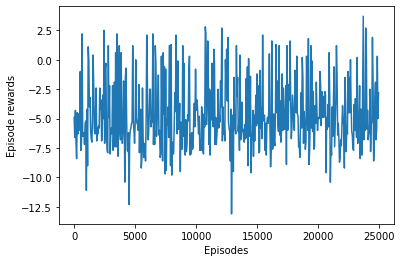

In [4]:
selected_rewards = []
timesteps = []

for t, r in enumerate(r_episode_rewards):
    if t % 50 == 0:
        selected_rewards.append(r)
        timesteps.append(t)
        
plt.plot(timesteps, selected_rewards)
plt.xlabel('Episodes')
plt.ylabel('Episode rewards')
plt.show()

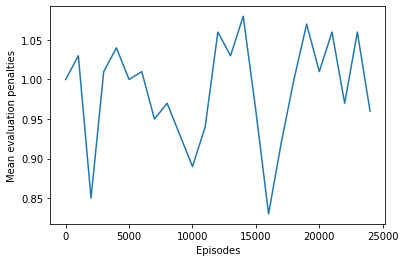

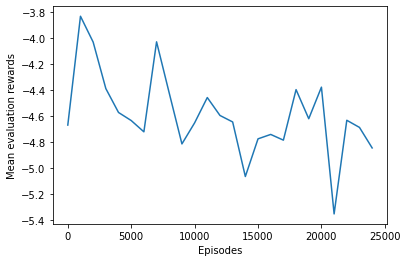

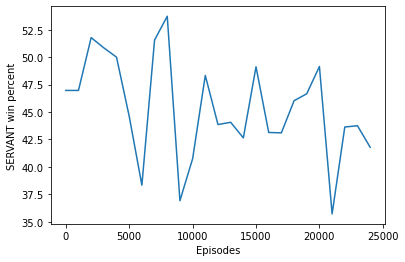

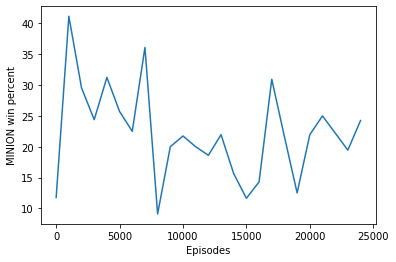

In [5]:
r_callback_episodes_range = np.arange(len(r_mean_eval_rewards)) * R_CALLBACK_INTERVAL


plot_eval_metric('Mean evaluation penalties', r_mean_eval_penalties, r_callback_episodes_range)
plot_eval_metric('Mean evaluation rewards', r_mean_eval_rewards, r_callback_episodes_range)

for ctype, win_data in r_agent_game_results.items():
    if not ctype:
        continue
    plot_eval_metric(f'{ctype.name} win percent', win_data, r_callback_episodes_range)

## Auto agent

In [6]:
# set autoplay to true, we can use any agent now, also penalties don't make sense in case of heuristic based actions
env = AvalonEnv(5, enable_logs=False, autoplay=True, enable_penalties=False) 
auto_agent = RandomAgent(env=env)
num_episodes = 25000
A_CALLBACK_INTERVAL = 1000
a_episode_rewards, a_mean_eval_rewards, a_std_eval_rewards, a_mean_eval_penalties, a_agent_game_results  = train(num_episodes, env, auto_agent, target_reward=5, last_n_plot=100, callback_every=A_CALLBACK_INTERVAL)


Average reward per episode 2.9100000000000006
Average penalties per episode: 0.0
Agent won 55.319148936170215% games out of 47 games while taking MINION role.
Agent won 37.735849056603776% games out of 53 games while taking SERVANT role.
Saving new best model to q_table.pickle

Average reward per episode 3.2390000000000003
Average penalties per episode: 0.0
Agent won 46.55172413793103% games out of 58 games while taking SERVANT role.
Agent won 61.904761904761905% games out of 42 games while taking MINION role.
Saving new best model to q_table.pickle

Average reward per episode 3.3200000000000007
Average penalties per episode: 0.0
Agent won 49.152542372881356% games out of 59 games while taking SERVANT role.
Agent won 63.41463414634146% games out of 41 games while taking MINION role.
Saving new best model to q_table.pickle

Average reward per episode 3.083
Average penalties per episode: 0.0
Agent won 45.0% games out of 60 games while taking SERVANT role.
Agent won 57.49999999999999% ga

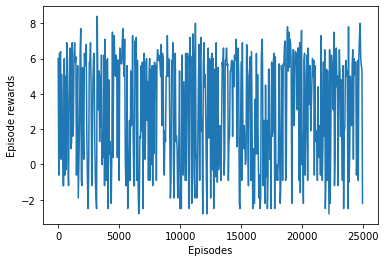

In [7]:
selected_rewards = []
timesteps = []

for t, r in enumerate(a_episode_rewards):
    if t % 50 == 0:
        selected_rewards.append(r)
        timesteps.append(t)
        
plt.plot(timesteps, selected_rewards)
plt.xlabel('Episodes')
plt.ylabel('Episode rewards')
plt.show()

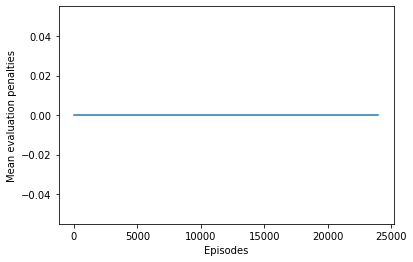

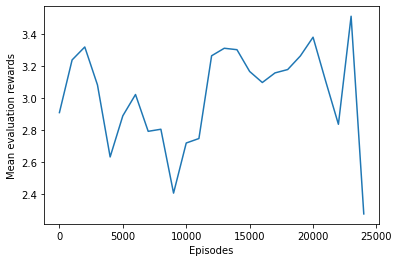

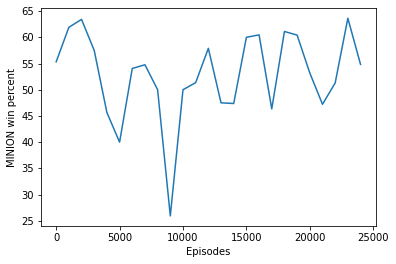

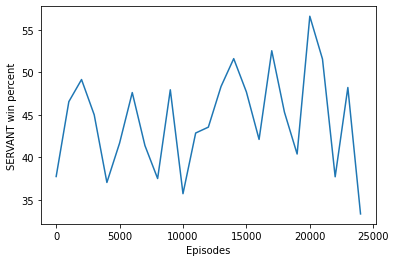

In [8]:
a_callback_episodes_range = np.arange(len(a_mean_eval_rewards)) * A_CALLBACK_INTERVAL


plot_eval_metric('Mean evaluation penalties', a_mean_eval_penalties, a_callback_episodes_range)
plot_eval_metric('Mean evaluation rewards', a_mean_eval_rewards, a_callback_episodes_range)

for ctype, win_data in a_agent_game_results.items():
    if not ctype:
        continue
    plot_eval_metric(f'{ctype.name} win percent', win_data, a_callback_episodes_range)